<a href="https://colab.research.google.com/github/danielamattos/Exercicios/blob/main/Daniela1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando os arquivos

import pandas as pd



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_ideb = pd.read_csv('/content/drive/MyDrive/sirius/Cópia de ideb.csv')

In [ ]:
df_seg_rj = pd.read_csv('/content/drive/MyDrive/sirius/Cópia de seg_rj.csv')

# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `media_saeb_mat`, `media_saeb_port` e `media_ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `media_saeb_mat`, `media_saeb_port` e `media_ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [ ]:
# seu código

df_ideb2 = df_ideb [['ano','id_municipio','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']]





In [ ]:
# seu código

df_ideb3 = df_ideb2.loc[df_ideb2['ano'] == 2019].groupby('id_municipio').mean()

df_ideb3 = df_ideb3.reset_index(drop = False)

df_ideb3


,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,1100015,2019.0,253.283750,242.246250,5.050000
1,1100023,2019.0,248.223750,243.618750,4.762500
2,1100031,2019.0,229.495000,221.500000,4.850000
3,1100049,2019.0,259.150000,249.888889,5.200000
4,1100056,2019.0,266.288571,254.334286,5.642857
...,...,...,...,...,...
5565,5222005,2019.0,272.708571,262.805714,6.000000
5566,5222054,2019.0,271.685714,264.780000,5.828571
5567,5222203,2019.0,241.580000,231.394286,4.657143
5568,5222302,2019.0,269.355000,269.730000,4.950000


### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [ ]:
df_pib = pd.read_csv('/content/drive/MyDrive/sirius/Cópia de pib.csv')

df_pib2 = df_pib [['pib','impostos_liquidos']]

df_pib3 = df_pib[['ano','id_municipio','pib','impostos_liquidos']]

df_pib4 = df_pib3.loc[df_pib3['ano'] == 2019].groupby('id_municipio').mean()

df_pib4 = df_pib4.reset_index(drop = False)

df_pib4

,id_municipio,ano,pib,impostos_liquidos
0,1100015,2019.0,4.956288e+08,2.935098e+07
1,1100023,2019.0,2.578830e+09,2.843976e+08
2,1100031,2019.0,1.399594e+08,5.997974e+06
3,1100049,2019.0,2.260644e+09,2.539883e+08
4,1100056,2019.0,5.068545e+08,7.667138e+07
...,...,...,...,...
5565,5222005,2019.0,4.836633e+08,3.774179e+07
5566,5222054,2019.0,3.423556e+08,3.356172e+07
5567,5222203,2019.0,1.136685e+08,8.405675e+06
5568,5222302,2019.0,2.069712e+08,7.933047e+06


In [ ]:
# seu código

### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [ ]:
# seu código

resultado = pd.merge(df_ideb3, df_pib4, how = 'inner', on = 'id_municipio')

resultado = resultado.drop(columns='ano_y')

resultado.rename(columns={'ano_x': 'ano'}, inplace=True)

resultado

,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
0,1100015,2019.0,253.283750,242.246250,5.050000,4.956288e+08,2.935098e+07
1,1100023,2019.0,248.223750,243.618750,4.762500,2.578830e+09,2.843976e+08
2,1100031,2019.0,229.495000,221.500000,4.850000,1.399594e+08,5.997974e+06
3,1100049,2019.0,259.150000,249.888889,5.200000,2.260644e+09,2.539883e+08
4,1100056,2019.0,266.288571,254.334286,5.642857,5.068545e+08,7.667138e+07
...,...,...,...,...,...,...,...
5565,5222005,2019.0,272.708571,262.805714,6.000000,4.836633e+08,3.774179e+07
5566,5222054,2019.0,271.685714,264.780000,5.828571,3.423556e+08,3.356172e+07
5567,5222203,2019.0,241.580000,231.394286,4.657143,1.136685e+08,8.405675e+06
5568,5222302,2019.0,269.355000,269.730000,4.950000,2.069712e+08,7.933047e+06


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [ ]:
# seu código

print(resultado.isnull().sum())

id_municipio                    0
ano                             0
nota_saeb_matematica           21
nota_saeb_lingua_portuguesa    21
ideb                           21
pib                             0
impostos_liquidos               0
dtype: int64


In [ ]:
# seu código

resultado.drop(['ano'], axis=1, inplace=True)


### Atividade 5: Quais são os tipos das variáveis do DataFrame?

id_municipio - nominal;
ano - discreto;
nota_saeb_matematica - contínua;
nota_saeb_lingua_portuguesa - contínua;
ideb - contínua;
pib - contínua;
impostos_liquidos - contínua

### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [ ]:
# seu código

import seaborn as sns

resultado.corr(method='spearman')

,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
id_municipio,1.000000,0.477500,0.467497,0.535183,0.182973,0.241602
nota_saeb_matematica,0.477500,1.000000,0.960929,0.811259,0.175707,0.233401
nota_saeb_lingua_portuguesa,0.467497,0.960929,1.000000,0.762744,0.224943,0.279383
ideb,0.535183,0.811259,0.762744,1.000000,0.151978,0.210089
pib,0.182973,0.175707,0.224943,0.151978,1.000000,0.960370
impostos_liquidos,0.241602,0.233401,0.279383,0.210089,0.960370,1.000000


A correlação entre as variáveis ideb e pib é fraca de acordo com o coeficiente de correlação de Spearman, já a correlação entre as variáveis nota_saeb_matematica e nota_saeb_lingua_portuguesa é forte.

### O que significa a correlação das variáveis `id_municipio` e `ideb`?

Não há correlação entre as duas variáveis, pois a variável id_municipio é uma variável nominal.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e procurar por correlações entre algumas das colunas.

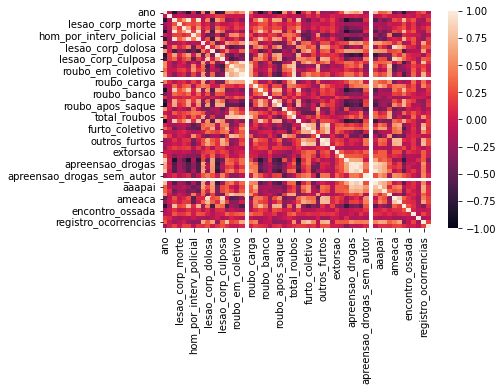

In [ ]:
# seu código

sns.heatmap(df_seg_rj.corr(), vmin = -1, vmax = 1, annot=False)

### Atividade 8: Selecione os dados apenas para o ano de 2020 e apenas as colunas `mês`, `hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial`, e `trafico_drogas`

In [ ]:
# seu código

df_seg_rj2 = df_seg_rj[['mes','hom_doloso','lesao_corp_morte','latrocinio','cvli','hom_por_interv_policial','trafico_drogas']]

df_seg_rj3 = df_seg_rj.loc[df_seg_rj['ano'] == 2020]

df_seg_rj3

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
204,2020,1,2020m01,2.07,0.02,0.05,2.14,0.90,3.04,2.59,...,7.71,1.53,28.54,2.31,0.21,0.01,4.53,0.00,379.53,3.0
205,2020,2,2020m02,1.88,0.01,0.06,1.95,0.95,2.90,2.43,...,6.87,1.40,26.80,2.18,0.23,0.01,2.26,0.00,362.79,3.0
206,2020,3,2020m03,2.16,0.01,0.05,2.22,0.66,2.88,2.08,...,5.27,1.04,18.71,1.57,0.09,0.00,4.53,0.00,287.41,3.0
207,2020,4,2020m04,1.80,0.03,0.03,1.86,1.03,2.89,1.87,...,3.14,0.01,12.78,1.03,0.15,0.02,2.26,0.00,189.23,3.0
208,2020,5,2020m05,1.57,0.00,0.03,1.61,0.75,2.36,1.68,...,3.96,0.03,13.26,1.04,0.09,0.02,0.00,11.17,201.75,3.0
209,2020,6,2020m06,1.49,0.01,0.01,1.52,0.20,1.71,1.77,...,4.40,0.05,16.29,1.21,0.12,0.01,6.79,0.00,241.46,3.0
210,2020,7,2020m07,1.48,0.02,0.04,1.54,0.30,1.84,2.17,...,7.66,0.07,21.08,1.37,0.10,0.02,2.26,0.00,295.07,3.0
211,2020,8,2020m08,1.50,0.01,0.07,1.58,0.29,1.88,2.04,...,8.70,0.20,23.61,1.58,0.17,0.02,0.00,22.34,289.78,3.0
212,2020,9,2020m09,1.37,0.02,0.04,1.43,0.31,1.74,1.97,...,6.09,0.21,23.55,1.71,0.13,0.01,0.00,0.00,280.34,3.0
213,2020,10,2020m10,1.59,0.01,0.03,1.63,0.83,2.47,2.32,...,5.71,0.21,24.11,1.71,0.14,0.02,4.53,0.00,291.93,3.0


In [ ]:
# seu código

In [ ]:
# seu código